In [483]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [484]:
from sklearn.datasets import load_iris
from cosinekmeans import CosineKMeans
from sklearn.preprocessing import MinMaxScaler

In [485]:
iris = load_iris()

In [486]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [487]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [506]:
from IPython.display import display
data = pd.DataFrame(data=iris.get('data'), columns=iris.get('feature_names'))
display(data.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

Text(0.5, 1.0, 'Partitioned Data')

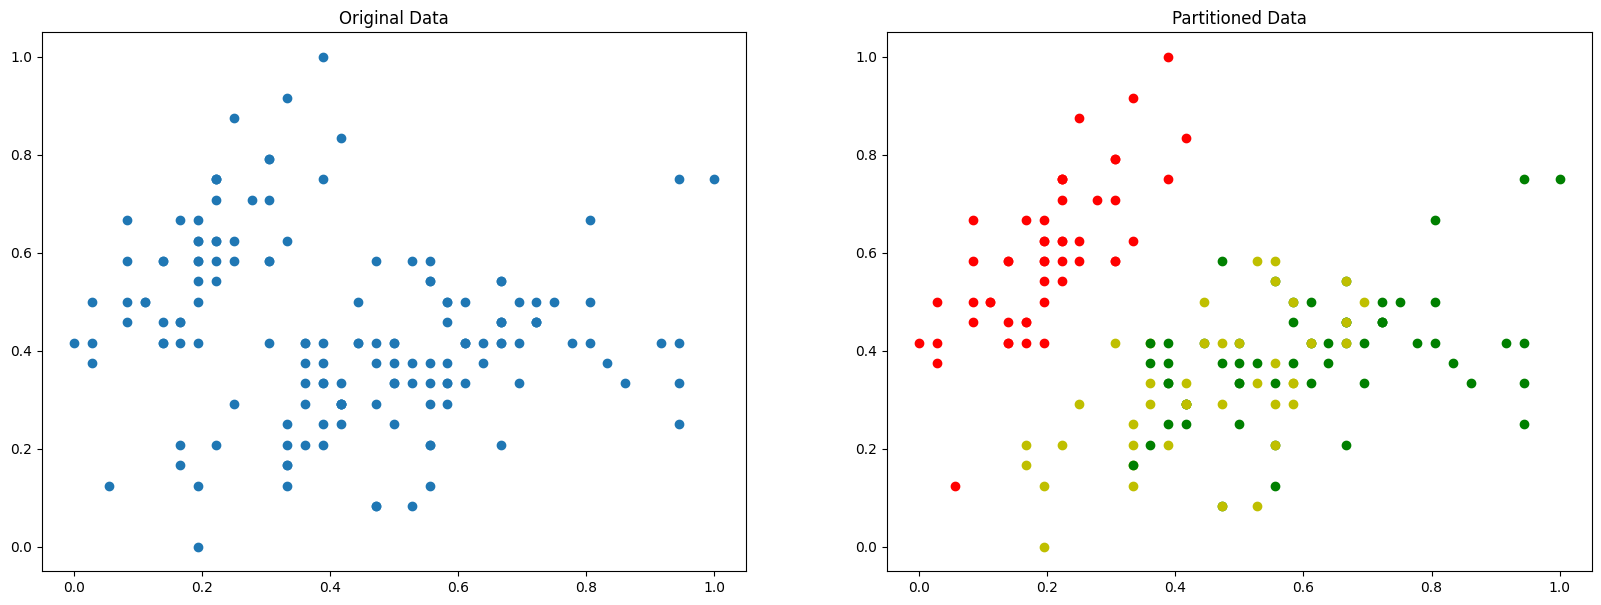

In [508]:
plt.figure(figsize=(20,7))

x = MinMaxScaler().fit_transform(data.values)
# x = MinMaxScaler().fit_transform(load_iris()['data'][:, [1,3]])
print(x)
plt.subplot(121)
plt.scatter(x[:,0], x[:,1]) #first and second column of x
plt.title('Original Data')

# km = KMeans(n_clusters=2)
# km.fit(x)
# target = km.predict(x)
# colors = {0: 'r', 1:'g'}
kmeans = CosineKMeans(num_clusters=3)
kmeans.fit(x)
target = kmeans.predict(x)
colors = {0: 'r', 1:'g', 2: 'y'}
    
# Predict cluster labels for new data
# new_data = np.random.rand(5, num_features)
# predicted_labels = kmeans.predict(new_data)
# print("Predicted labels:", predicted_labels)

plt.subplot(122)
for instance, tg in zip(x, target):
    plt.scatter(instance[0], instance[1], color=colors[tg])
plt.title('Partitioned Data')
    

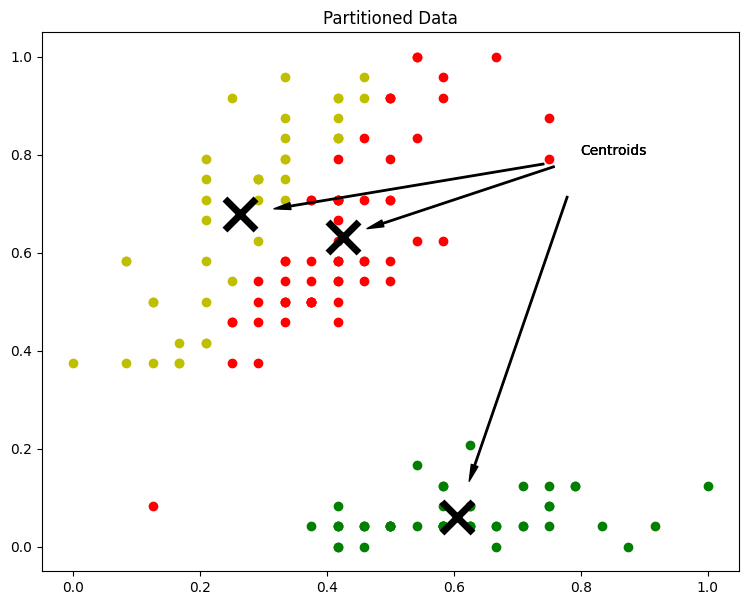

In [490]:
plt.figure(figsize=(9,7))
for instance, tg in zip(x, target):
    plt.scatter(instance[0], instance[1], color=colors[tg])
plt.title('Partitioned Data')

centroids = kmeans.cluster_centers #[[0.19611111 0.595      0.07830508 0.06083333] [0.545      0.36333333 0.6620339  0.65666667]]
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], color='k', marker='x', lw=5, s=500)
    plt.annotate('Centroids', xytext=(0.8, 0.8), xy=(centroid[0], centroid[1]),
                arrowprops=dict(facecolor='black', shrink=0.1, width=1, headwidth=5))


In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.style import use
from metaheuristics.algorithm._abc_ import ABC
from metaheuristics.optimization.objection_function import QuantizationError
from metaheuristics.optimization.objection_function import SumOfSquaredErrors

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

In [492]:
def decode_centroids(centroids, n_clusters, data):
    print(data.shape[1])
    return centroids.reshape(n_clusters, data.shape[1])

In [493]:
data = MinMaxScaler().fit_transform(load_iris()['data'][:, [1,3]])

Text(0.5, 1.0, 'Original Data')

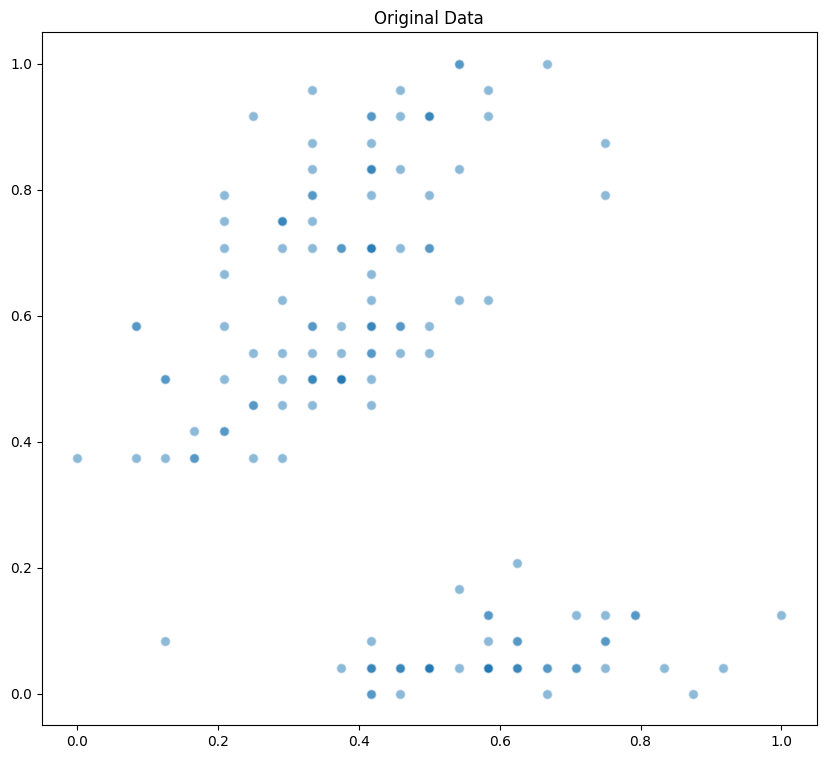

In [494]:
plt.figure(figsize=(10, 9))
plt.scatter(data[:,0], data[:,1], s=50, edgecolor='w', alpha=0.5)
plt.title('Original Data')

Text(0.5, 1.0, 'Original Groups')

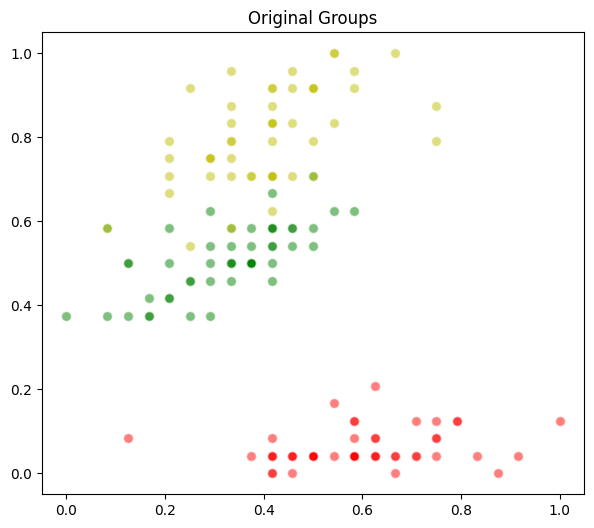

In [495]:
colors = ['r', 'g', 'y']
target = load_iris()['target']


plt.figure(figsize=(7,6))
for instance, tgt in zip(data, target):
    plt.scatter(instance[0], instance[1], s=50,
                edgecolor='w', alpha=0.5, color=colors[tgt])
plt.title('Original Groups')

In [504]:
print(data)

[[0.625      0.04166667]
 [0.41666667 0.04166667]
 [0.5        0.04166667]
 [0.45833333 0.04166667]
 [0.66666667 0.04166667]
 [0.79166667 0.125     ]
 [0.58333333 0.08333333]
 [0.58333333 0.04166667]
 [0.375      0.04166667]
 [0.45833333 0.        ]
 [0.70833333 0.04166667]
 [0.58333333 0.04166667]
 [0.41666667 0.        ]
 [0.41666667 0.        ]
 [0.83333333 0.04166667]
 [1.         0.125     ]
 [0.79166667 0.125     ]
 [0.625      0.08333333]
 [0.75       0.08333333]
 [0.75       0.08333333]
 [0.58333333 0.04166667]
 [0.70833333 0.125     ]
 [0.66666667 0.04166667]
 [0.54166667 0.16666667]
 [0.58333333 0.04166667]
 [0.41666667 0.04166667]
 [0.58333333 0.125     ]
 [0.625      0.04166667]
 [0.58333333 0.04166667]
 [0.5        0.04166667]
 [0.45833333 0.04166667]
 [0.58333333 0.125     ]
 [0.875      0.        ]
 [0.91666667 0.04166667]
 [0.45833333 0.04166667]
 [0.5        0.04166667]
 [0.625      0.04166667]
 [0.66666667 0.        ]
 [0.41666667 0.04166667]
 [0.58333333 0.04166667]


In [496]:
objective_function = SumOfSquaredErrors(dim=6, n_clusters=3, data=data)


In [497]:
optimizer = ABC(obj_function=objective_function, colony_size=30, n_iter=300, max_trials=100)

In [498]:
optimizer.optimize()

WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK
WORKKKKKKKKK

In [499]:
centroids = dict(enumerate(decode_centroids(optimizer.optimal_solution.pos, n_clusters=3, data=data)))
print(centroids)

2
{0: array([0.63150973, 0.17872284]), 1: array([0.37898476, 0.76701309]), 2: array([0.19556898, 0.22948374])}


In [500]:
def assign_centroid(centroids, point):
    distances = [np.linalg.norm(point - centroids[idx]) for idx in centroids]
    return np.argmin(distances)

In [501]:
custom_tgt = []
for instance in data:
    custom_tgt.append(assign_centroid(centroids, instance))

Text(0.5, 1.0, 'Partitioned Data found by ABC')

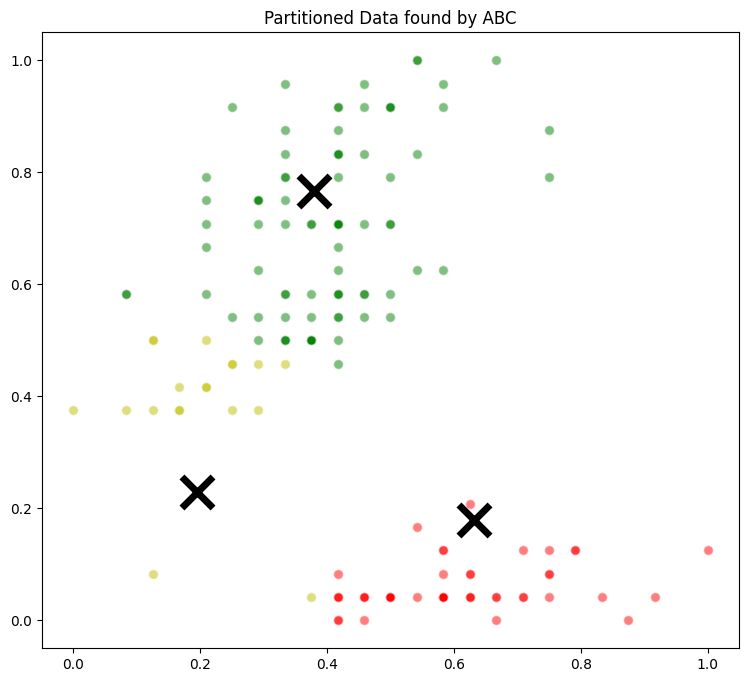

In [502]:
colors = ['r', 'g', 'y']
plt.figure(figsize=(9,8))
for instance, tgt in zip(data, custom_tgt):
    plt.scatter(instance[0], instance[1], s=50, edgecolor='w', alpha=0.5, color=colors[tgt])

for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1],
                color='k', marker='x', lw=5, s=500)
plt.title('Partitioned Data found by ABC')

Text(0.5, 0, 'Iteration')

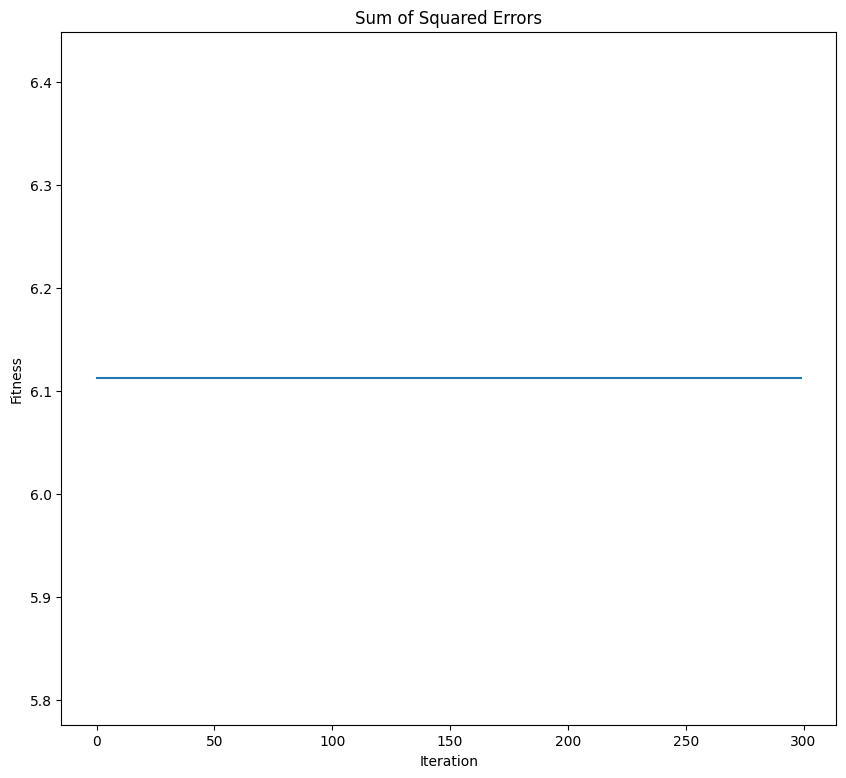

In [503]:
itr = range(len(optimizer.optimality_tracking))
val = optimizer.optimality_tracking
plt.figure(figsize=(10, 9))
plt.plot(itr, val)
plt.title('Sum of Squared Errors')
plt.ylabel('Fitness')
plt.xlabel('Iteration')